<h2 style='color:blue' align="center">Support Vector Machine Tutorial Using Python Sklearn</h2>

In [1]:
#import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris


In [2]:
#load the iris dataset

iris = load_iris()

In [3]:
#Display feature names

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

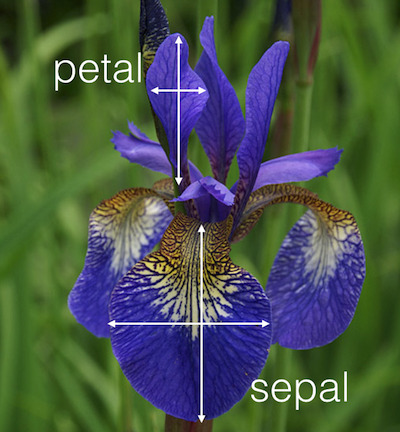

In [4]:
#Types of flowers

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
#Creating a dataframe 

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [6]:
#adding the target column

df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [7]:
df[df.target==1].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target  
50       1  
51       1  
52       1  
53       1  
54       1

In [8]:
df[df.target==2].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target  
100       2  
101       2  
102       2  
103       2  
104       2

In [9]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   flower_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df[45:55]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
45                4.8               3.0                1.4               0.3   
46                5.1               3.8                1.6               0.2   
47                4.6               3.2                1.4               0.2   
48                5.3               3.7                1.5               0.2   
49                5.0               3.3                1.4               0.2   
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target flower_name  
45       0      setosa  
46       0      setosa  
47       0      setosa  
48       0      setosa  
49       0      setosa  
50       1  versicolor  
51       1  versicolor  
52       1  versicolor  
53       1  versicolor  
54       1  versicolor

In [12]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

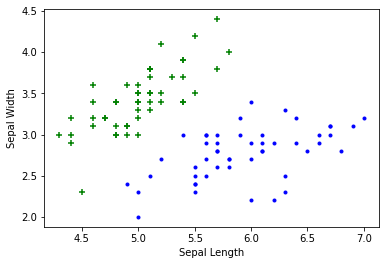

In [13]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

**Petal length vs Pepal Width (Setosa vs Versicolor)**

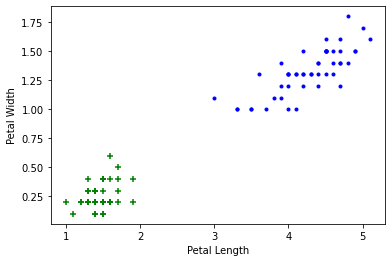

In [14]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

**Train Using Support Vector Machine (SVM)**

In [15]:
X = df.drop(['target','flower_name'], axis=1)
y = df.target


In [16]:
from sklearn.model_selection import train_test_split

#split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
len(X_train)
print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
72                 6.3               2.5                4.9               1.5
9                  4.9               3.1                1.5               0.1
38                 4.4               3.0                1.3               0.2
147                6.5               3.0                5.2               2.0
108                6.7               2.5                5.8               1.8
..                 ...               ...                ...               ...
100                6.3               3.3                6.0               2.5
109                7.2               3.6                6.1               2.5
96                 5.7               2.9                4.2               1.3
123                6.3               2.7                4.9               1.8
18                 5.7               3.8                1.7               0.3

[120 rows x 4 columns]


In [18]:
print(y_train)

72     1
9      0
38     0
147    2
108    2
      ..
100    2
109    2
96     1
123    2
18     0
Name: target, Length: 120, dtype: int64


In [19]:
len(X_test)

30

In [20]:
from sklearn.svm import SVC

#creating the model
model = SVC()

In [21]:
#fit the training set into the model
model.fit(X_train, y_train)

SVC()

In [22]:
#finding accuracy score
model.score(X_test, y_test)

0.9666666666666667

In [23]:
#Making predictions

model.predict([[6.5,3.4,5.7,2.1]])


array([2])

**Tune parameters**

**1. Regularization (C)**

In [33]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9

[[ 5  0  0]
 [ 0 10  1]
 [ 0  2 12]]


<AxesSubplot:title={'center':'Confusion Matrix testing data'}>

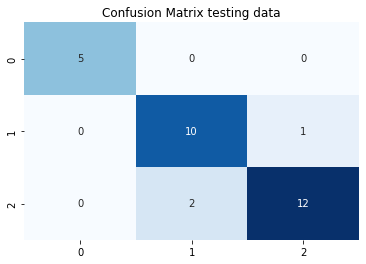

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model_C.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False,cmap='Blues')

In [35]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

**2. Gamma**

In [36]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

**3. Kernel**

In [37]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
model_linear_kernal.score(X_test, y_test)

1.0